# COVID-19 Analysis

## Processing of Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def convert_columns(data):
    '''Convert dates in Strings to Datetime.'''
    for i in np.arange(len(data.columns[4:])):
        data.rename(columns={data.columns[4:][i]:pd.to_datetime(data.columns[4:][i])}, inplace=True)

In [4]:
# Cumulative Data
cum_confirmed_data = pd.read_csv('time_series_19-covid-Confirmed.csv')
cum_deaths_data = pd.read_csv('time_series_19-covid-Deaths.csv')
#cum_recovered_data = pd.read_csv('time_series_19-covid-recovered.csv')

convert_columns(cum_confirmed_data)
convert_columns(cum_deaths_data)

world_cum_confirmed_cases = cum_confirmed_data.iloc[:, 4:].sum(axis=0)
world_cum_deaths_cases = cum_deaths_data.iloc[:, 4:].sum(axis=0)
#world_cum_recovered_cases = cum_recovered_data.iloc[:, 4:].sum(axis=0)

In [5]:
# New Data
def cumulative_to_new(data):
    '''Convert cumulative data to new cases data.'''
    new_data = data.copy()
    new_data.insert(4, '1/21/20', np.zeros(len(data), dtype=int))
    for i in np.arange(len(new_data['Country/Region'])):
        new_data.loc[i, 5:] = np.array(new_data.iloc[i, 5:]) - np.array(new_data.iloc[i, 4:-1])
    return new_data

new_confirmed_data = cumulative_to_new(cum_confirmed_data)
new_deaths_data = cumulative_to_new(cum_deaths_data)
#new_recovered_data = cumulative_to_new(cum_recovered_data)

In [6]:
# Active Data
#active_data = cum_confirmed_data.copy()
#for i in np.arange(len(active_data['Country/Region'])):
#    active_data.loc[i, 4:] = cum_confirmed_data.iloc[i, 4:] - cum_deaths_data.iloc[i, 4:] - cum_recovered_data.iloc[i, 4:]

## Accessing Values

In [7]:
def convert_region_type(region_type):
    if region_type == 'country' or region_type == 'region':
        region_type = 'Country/Region'
    elif region_type == 'province' or region_type == 'state':
        region_type = 'Province/State'
    else:
        raise NameError("'"+ region_type + "' is not in list of region types. Try one of ['country', 'region', 'province', 'state'].")
    return region_type

In [8]:
def access(data, region_name, region_type, date):
    '''
    Access data.
    
    Parameters
    ----------
    data: DataFrame
    region_name: String
    region_type: String    
    date: String
    
    Returns
    -------
    int: amount of cases.
    '''
    date = pd.to_datetime(date)
    region_type = convert_region_type(region_type)
    return data[data[region_type] == region_name].sum(axis=0)[date]

In [9]:
access(cum_confirmed_data, 'US', 'country', '3/25/20')

65778

## Extreme Values

In [10]:
condition = cum_confirmed_data.iloc[:, -1] > 10000

In [11]:
cum_confirmed_data.sort_values(by=cum_confirmed_data.columns[-1], ascending=False).head(5)

,Province/State,Country/Region,Lat,Long,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,...,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386
62,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67798,67799,67800,67800,67800,67800,67800,67800,67801,67801
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,4632,6421,7783,13677,19100,25489,33276,43847,53740,65778
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323


## Data Visualization

### Graphing Cases Worldwide

In [12]:
def world_cases(dataframes, data_labels, start_date='2020-01-22', end_date=None):
    '''
    Cumulative cases worldwide.
    
    Parameters
    ----------
    dataframes: array-like, dtype = DataFrame, length <= 3, have same dimension as data_labels
        
    data_labels: array-like, dtype = String, length <= 3, have same dimension as dataframes
    
    start_date: String, optional, default: '2020-01-22'
    
    end_date: String, optional, default: None
    
    Returns
    -------
    None
        Show a graph of the data.
    '''
    
    if len(dataframes) != len(data_labels):
        raise ValueError('dataframes and data_labels must have same dimension, but have shapes ' + str(len(dataframes)) + ' and ' + str(len(data_labels)))
    start_date = pd.to_datetime(start_date)
    if (not end_date):
        end_date = dataframes[0].index[-1]

    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cumulative Confirmed Cases Worldwide')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cumulative Cases')
    dates = dataframes[0].index
    label = 'o-'
    color = ['tab:blue', 'tab:orange', 'tab:green']
    
    for i in np.arange(len(dataframes)):
        xaxis = dates[dates.get_loc(start_date):dates.get_loc(end_date)+1]
        yaxis = dataframes[i][dates.get_loc(start_date):dates.get_loc(end_date)+1]
        plt.plot(xaxis, yaxis, 
                 label, color=color[i], markersize=3, label=data_labels[i])
    # x axis
    xmin = start_date
    xmax = end_date
    plt.xlim(xmin, xmax + (xmax - xmin) * 0.02)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # others
    plt.legend(fontsize='x-small')
    plt.grid(True, axis='y')

C:\Softwares\Anaconda\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


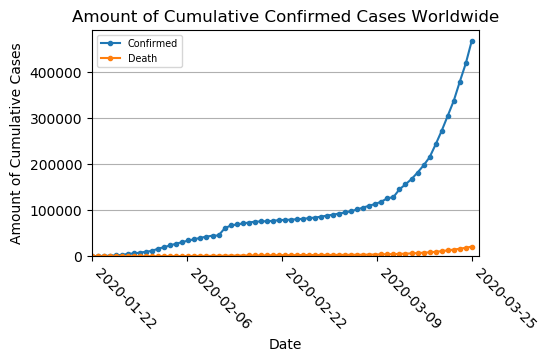

In [13]:
world_cases([world_cum_confirmed_cases, world_cum_deaths_cases], 
                     ['Confirmed', 'Death'])

### Graphing Cases in Regions

In [14]:
def region_cases(dataframes, data_labels, region_name, region_type, start_date='2020-01-22', end_date=None):
    '''
    Graphs the data of particular region from start date to end date.

    Parameters
    ----------
    dataframes: array-like, dtype = DataFrame, length <= 3, have same dimension as data_labels
        
    data_labels: array-like, dtype = String, length <= 3, have same dimension as dataframes
    
    region_name: array-like, dtype = String, length <= 4, has same dimension as region_type
        
    region_type: array-like, dtype = String, length <= 4, has same dimension as region_name
        Accepting one of: ['country', 'region', 'province', 'state']
    
    start_date: String or None, optional, default: '2020-01-22'
    
    end_date: String or None, optional, default: None

    Return
    ------
    None
        Show a graph of the data.
    '''
    if len(dataframes) != len(data_labels):
        raise ValueError('dataframes and data_labels must have same dimension, but have shapes ' + str(len(dataframes)) + ' and ' + str(len(data_labels)))
    
    if len(region_name) != len(region_type):
        raise ValueError('region_name and region_type must have same dimension, but have shapes ' + str(len(region_name)) + ' and ' + str(len(region_type)))

    start_date = pd.to_datetime(start_date)
    if (not end_date):
        end_date = dataframes[0].iloc[0, 4:].index[-1]
    
    # Graph settings
    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cases')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cases')
    label = ['o-', '>-', 's-']
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    for j in np.arange(len(region_name)):
        region_type[j] = convert_region_type(region_type[j])
        for i in np.arange(len(dataframes)):
            cum_data = dataframes[i][dataframes[i][region_type[j]] == region_name[j]].iloc[:, 4:].sum(axis=0)
            dates = cum_data.index
            xaxis = dates[dates.get_loc(start_date):dates.get_loc(end_date)+1]
            yaxis = cum_data[dates.get_loc(start_date):dates.get_loc(end_date)+1]
            plt.plot(xaxis, yaxis, 
                     label[i], color=color[j], markersize=3, label=region_name[j] + ' ' + data_labels[i])
    # x axis
    xmin = start_date
    xmax = end_date
    plt.xlim(xmin, xmax + (xmax - xmin) * 0.05)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # others
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, axis='y')

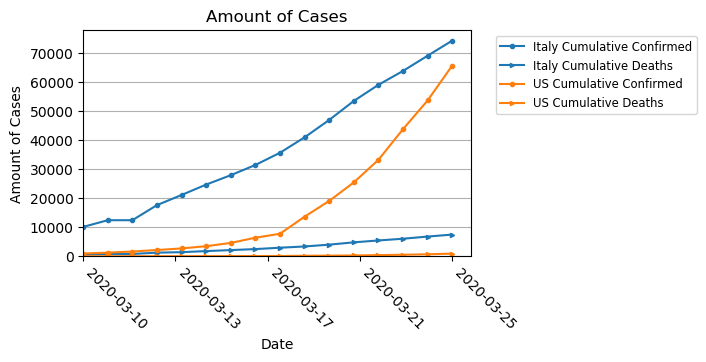

In [15]:
region_cases([cum_confirmed_data, cum_deaths_data], ['Cumulative Confirmed', 'Cumulative Deaths'],
            ['Italy', 'US'], ['country', 'country'], '2020/3/10')

## Predictive Analysis

### Predicting Future Cases by Exponential Fit

In [16]:
def predict(dataframe, data_label, region_name, region_type='region', prediction_date=None, threshold=None, show_plot=True):
    '''
    Predicts amount of cumulative cases on future dates by exponential fit.

    Parameters
    ----------
    dataframe: DataFrame
    
    data_label: String
    
    region_name: String
        
    region_type: String, optional, default: 'region'
        Accepting one of: ['country', 'region', 'province', 'state']
    
    prediction_date: String, Datetime, or None, optional, default: None
    
    threshold: int, float, or None, optional, default: None
    
    show_plot: bool, optional, default: True

    Return
    ------
    prediction: int
        Amount of cumulative cases at the date. 
        Show a graph of the original data and the exponential fit if (show_plot == True).
    '''
    def exp(x, offset, scale, stretch, delay):
        return scale * np.e ** (x / stretch - delay) + offset
    
    # process original data
    region_type = convert_region_type(region_type)
    cum_data = dataframe[dataframe[region_type] == region_name].iloc[:, 4:].sum(axis=0)
    if not threshold:
        threshold = cum_data[-1] * 0.05
    elif (type(threshold) != int) and (type(threshold) != float):
        raise TypeError('parameter threshold expects int or float, but given ' + type(threshold).__name__)
    elif threshold < 1:
        threshold = cum_data[-1] * threshold
    elif threshold >= 1:
        threshold = threshold
    cum_data = cum_data[sum(cum_data < threshold):]
    original_xaxis = cum_data.index
    original_yaxis = cum_data
    
    # fit original data using exponential fit 
    if not prediction_date:
        prediction_date = (dataframe.columns[-1] + pd.Timedelta('1 days')).date()
    else:
        prediction_date = pd.to_datetime(prediction_date)
    start_date = original_xaxis[0].date()
    end_date = (prediction_date + pd.Timedelta('1 days')).date()

    params, cov = curve_fit(exp, np.arange(len(original_xaxis)), original_yaxis,
                            bounds=[-np.array([1e4, 0, 0, 100]), np.array([1e4, 10, 10, 100])])

    prediction_xaxis = pd.date_range(start_date, end_date)
    prediction_yaxis = exp(np.arange(len(prediction_xaxis)), *params)
    prediction = int(round(prediction_yaxis[-2]))
    
    # Graph results
    if show_plot:
        plt.figure(figsize=(5, 3), dpi=100)
        plt.title('Amount of Cases')
        plt.xlabel('Date')
        plt.ylabel('Amount of Cases')
        plt.plot(original_xaxis, original_yaxis, '.b', label=region_name + '\n' + data_label, zorder=5)
        plt.plot(prediction_xaxis, prediction_yaxis, '.r', label='Exponential fit', zorder=1)
        # x axis
        xmin = start_date
        xmax = end_date + pd.Timedelta('1 days')
        plt.xlim(xmin, xmax + (xmax - xmin) * 0.05)
        plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
        # y axis
        ymin = 0
        plt.ylim(ymin)
        # other
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
        plt.grid(True, axis='y')

    return prediction

83543

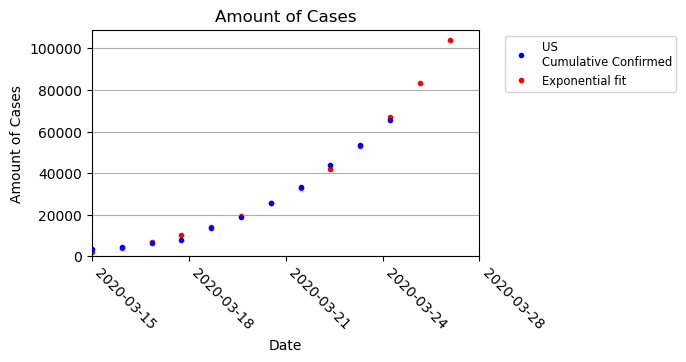

In [17]:
predict(cum_confirmed_data, 'Cumulative Confirmed', 'US', 'country', '2020/3/26')

## Cross-sectional analysis

In [18]:
pd.read_csv('newest-total.csv')

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-25 23:33:19,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-25 23:33:19,30.295065,-92.414197,2,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-25 23:33:19,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-25 23:33:19,43.452658,-116.241552,24,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-25 23:33:19,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,NaN,NaN,NaN,Uzbekistan,2020-03-25 23:33:04,41.377491,64.585262,60,0,0,60,Uzbekistan
3416,NaN,NaN,NaN,Venezuela,2020-03-25 23:33:04,6.423800,-66.589700,91,0,15,76,Venezuela
3417,NaN,NaN,NaN,Vietnam,2020-03-25 23:33:04,14.058324,108.277199,141,0,17,124,Vietnam
3418,NaN,NaN,NaN,Zambia,2020-03-25 23:33:04,-13.133897,27.849332,12,0,0,12,Zambia
